/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: The following kwargs were not used by contour: 'camp'
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


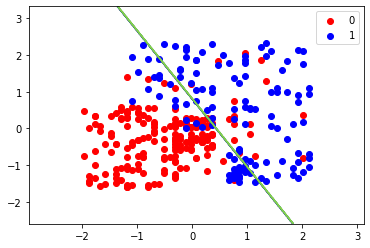

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('S(1).csv')
x = data.iloc[:, [0,1]].values
y = data.iloc[:, 2]

from sklearn.model_selection import train_test_split
x_train, x_test, y_trian, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train.astype(float))
x_test = sc.transform(x_test.astype(float))

from sklearn.linear_model import LogisticRegression
logistics = LogisticRegression()
logistics.fit(x_train, y_trian)


from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_trian
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step = 0.01))

plt.contour(x1, x2, logistics.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha = 0.75, camp = ListedColormap(('red', 'blue')))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], 
                c = ListedColormap(('red', 'blue'))(i), label=j)
plt.legend()
plt.show()